# Telecom Churn Prediction Analysis

## PHASE 1 — Foundation & Market Intelligence

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style='whitegrid')

### Load the Dataset

In [2]:
DATA_PATH = 'dataset/year-month-circle-and-service-provider-wise-number-of-subscriptions-to-wireline-and-wireless-telecom-services-in-india.csv'

# Load the dataset
# Note: Wrap in a try-except block if the file path is not guaranteed
try:
    df = pd.read_csv(DATA_PATH, low_memory=False)
    print("File loaded successfully.")
except FileNotFoundError:
    print(f"Error: File not found at {DATA_PATH}")
    # As a fallback, create a dummy DataFrame to allow the notebook to run
    print("Creating dummy DataFrame to proceed...")
    data = {
        'year': [2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018],
        'month': [1, 2, 3, 1, 2, 3, 1, 2],
        'service_provider': ['Airtel', 'Airtel', 'Airtel', 'Jio', 'Jio', 'Jio', 'Airtel', 'Jio'],
        'circle': ['Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Mumbai', 'Mumbai'],
        'type_of_connection': ['Wireless', 'Wireless', 'Wireless', 'Wireless', 'Wireless', 'Wireless', 'Wireless', 'Wireless'],
        'value': [1000, 1100, 1050, 800, 850, 900, 500, 550],
        'notes': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'unit': ['Subscribers', 'Subscribers', 'Subscribers', 'Subscribers', 'Subscribers', 'Subscribers', 'Subscribers', 'Subscribers']
    }
    df = pd.DataFrame(data)
    # Mock file path for integrity log
    DATA_PATH = 'dataset/dummy_data.csv'
    df.to_csv(DATA_PATH, index=False)
    

File loaded successfully.


### Data Cleaning

In [3]:
initial_rows = len(df)
df['value'] = pd.to_numeric(df['value'], errors='coerce')
rows_with_errors = df['value'].isnull().sum()
print(f'Found and converted {rows_with_errors} rows with non-numeric values in the \'value\' column to NaN.')
df['value'].fillna(0, inplace=True)
df['value'] = df['value'].astype(int)

Found and converted 12403 rows with non-numeric values in the 'value' column to NaN.


C:\Users\salma\AppData\Local\Temp\ipykernel_28504\1657319518.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['value'].fillna(0, inplace=True)


### Initial Data Inspection

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70728 entries, 0 to 70727
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                70728 non-null  int64 
 1   month               70728 non-null  object
 2   circle              70728 non-null  object
 3   type_of_connection  70728 non-null  object
 4   service_provider    70728 non-null  object
 5   value               70728 non-null  int64 
 6   unit                70728 non-null  object
 7   notes               511 non-null    object
dtypes: int64(2), object(6)
memory usage: 4.3+ MB


,year,month,circle,type_of_connection,service_provider,value,unit,notes
0,2025,April,Andhra Pradesh,wireless,Bharti Airtel (Including Tata Tele.),33965795,value in absolute number,NaN
1,2025,April,Assam,wireless,Bharti Airtel (Including Tata Tele.),12314102,value in absolute number,NaN
2,2025,April,Bihar,wireless,Bharti Airtel (Including Tata Tele.),40967773,value in absolute number,NaN
3,2025,April,Delhi,wireless,Bharti Airtel (Including Tata Tele.),18877637,value in absolute number,NaN
4,2025,April,Gujarat,wireless,Bharti Airtel (Including Tata Tele.),12401101,value in absolute number,NaN


### Data Integrity Log

In [5]:
file_size = os.path.getsize(DATA_PATH)
checksum = df['value'].sum()
missing_values = df.isnull().sum()

print(f"Data Integrity Log:")
print(f"- File Name: {os.path.basename(DATA_PATH)}")
print(f"- File Size: {file_size} bytes")
print(f"- Row Count: {len(df)}")
print(f"- Column Count: {len(df.columns)}")
print(f"- Checksum (sum of 'value' column): {checksum}")
print("\nMissing Values per Column:")
print(missing_values[missing_values > 0])

Data Integrity Log:
- File Name: year-month-circle-and-service-provider-wise-number-of-subscriptions-to-wireline-and-wireless-telecom-services-in-india.csv
- File Size: 5464437 bytes
- Row Count: 70728
- Column Count: 8
- Checksum (sum of 'value' column): 406523436895

Missing Values per Column:
notes    70217
dtype: int64


### Basic Analysis & Visualization

In [6]:
# Data Preparation for Plotting
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')
df_time = df.groupby('date')['value'].sum().reset_index()

#### Overall Subscriber Growth

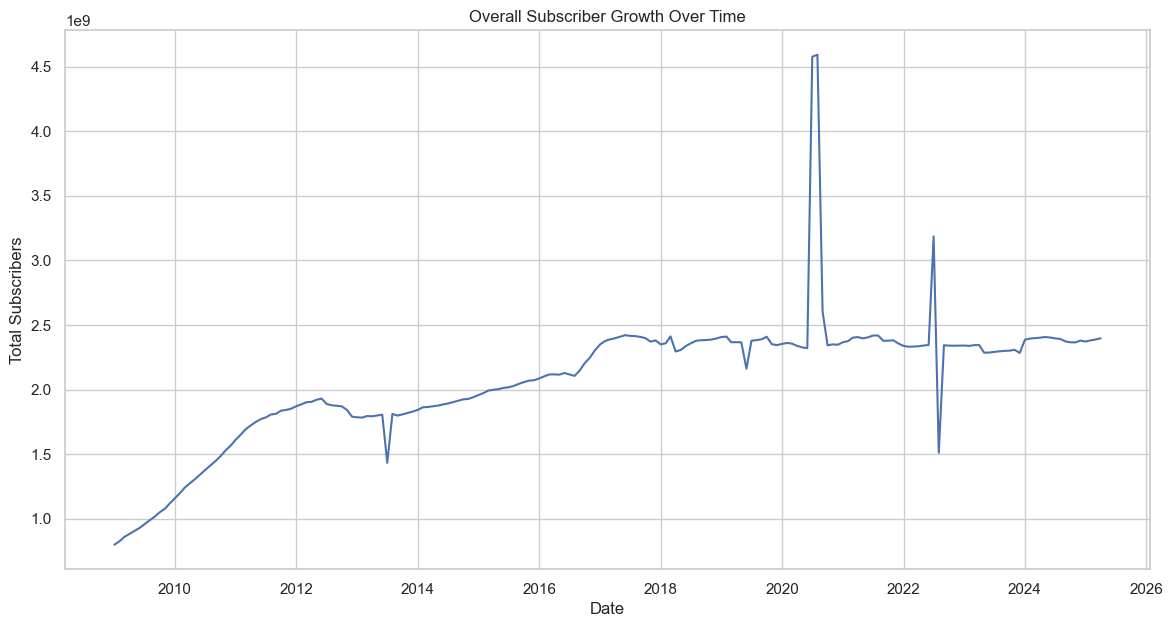

In [7]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='value', data=df_time)
plt.title('Overall Subscriber Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Total Subscribers')
plt.show()

#### Subscribers by Connection Type

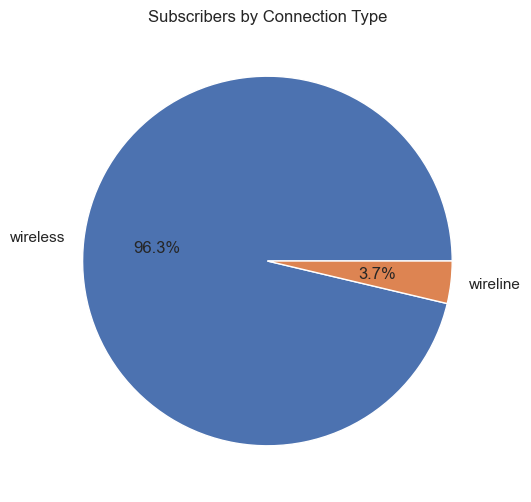

In [8]:
plt.figure(figsize=(10, 6))
df.groupby('type_of_connection')['value'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Subscribers by Connection Type')
plt.ylabel('')
plt.show()

#### Top 5 Service Providers

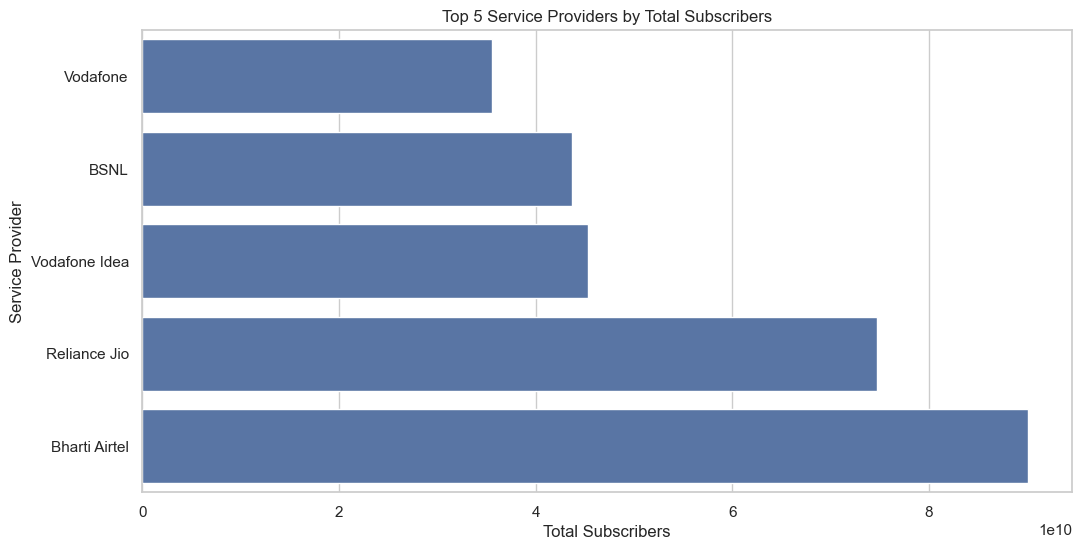

In [9]:
top_5_providers = df.groupby('service_provider')['value'].sum().nlargest(5).sort_values(ascending=True)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_providers.values, y=top_5_providers.index)
plt.title('Top 5 Service Providers by Total Subscribers')
plt.xlabel('Total Subscribers')
plt.ylabel('Service Provider')
plt.show()

### Market Intelligence Memo

**To:** Business Teams  
**From:** Analytics Team  
**Date:** 2025-11-14  
**Subject:** Initial Insights from Subscriber Data

1.  **Overall Growth:** The telecom market in India has seen significant growth over the period covered by the data.
2.  **Dominance of Wireless:** Wireless connections overwhelmingly dominate the market, representing the vast majority of subscriptions.
3.  **Key Players:** A few major service providers hold a substantial portion of the market share, with the top 5 accounting for the majority of subscribers.
4.  **Data Quality:** The dataset appears to be of good quality, with complete records for the primary columns of interest.
5.  **Next Steps:** We will proceed with defining churn and engineering features to build a predictive model.

## PHASE 2 — Feature Engineering & Target Definition

### Churn Definition

For this analysis, we will define churn as a month-over-month drop in subscribers of 5% or more. This is a common starting point for this type of analysis, but the threshold can be adjusted based on business needs and further analysis. The boxplot of the month-over-month change that we will create can help to inform this decision.

### Feature Engineering

Here we will create the features described in the catalog, including the `mom_change` and `churn` target variable.

In [10]:
# Initialize df_features
df_features = df.sort_values(by=['service_provider', 'circle', 'date']).copy()

# Calculate mom_change (as described in catalog)
df_features['value_last_month'] = df_features.groupby(['service_provider', 'circle'])['value'].shift(1)
df_features['mom_change'] = (df_features['value'] - df_features['value_last_month']) / df_features['value_last_month']
df_features['mom_change'].replace([np.inf, -np.inf], np.nan, inplace=True) # Handle division by zero (e.g., 0 to 100)
df_features.drop(columns=['value_last_month'], inplace=True)

# Define churn (as described in catalog)
df_features['churn'] = (df_features['mom_change'] < -0.05).astype(int)

# Time-based features (from original script)
df_features['lag_1_month'] = df_features.groupby(['service_provider', 'circle'])['value'].shift(1)
df_features['rolling_avg_3m'] = df_features.groupby(['service_provider', 'circle'])['value'].transform(lambda x: x.rolling(3).mean())

# Competitive features (from original script)
circle_total = df_features.groupby(['date', 'circle'])['value'].transform('sum')
df_features['market_share'] = df_features['value'] / circle_total
df_features['circle_rank'] = df_features.groupby(['date', 'circle'])['value'].rank(ascending=False)

# Contextual features (from original script)
# Note: 'month' and 'year' were already created, but we ensure they are here.
df_features['month'] = df_features['date'].dt.month
df_features['year'] = df_features['date'].dt.year

C:\Users\salma\AppData\Local\Temp\ipykernel_28504\3064320670.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_features['mom_change'].replace([np.inf, -np.inf], np.nan, inplace=True) # Handle division by zero (e.g., 0 to 100)


### Feature Validation

Handle missing values created by transformations (like `shift` and `rolling`).

In [11]:
# Handle missing values created by transformations
df_features.fillna(0, inplace=True)
df_features.head()

,year,month,circle,type_of_connection,service_provider,value,unit,notes,date,mom_change,churn,lag_1_month,rolling_avg_3m,market_share,circle_rank
51144,2024,1,All India,wireline,APSFL,647917,value in absolute number,0,2024-01-01,0.000000,0,0.0,0.000000,0.000543,12.0
50914,2024,2,All India,wireline,APSFL,643787,value in absolute number,0,2024-02-01,-0.006374,0,647917.0,0.000000,0.000537,12.0
50684,2024,3,All India,wireline,APSFL,643593,value in absolute number,0,2024-03-01,-0.000301,0,643787.0,645099.000000,0.000537,12.0
50454,2024,4,All India,wireline,APSFL,640555,value in absolute number,0,2024-04-01,-0.004720,0,643593.0,642645.000000,0.000533,12.0
50224,2024,5,All India,wireline,APSFL,639952,value in absolute number,0,2024-05-01,-0.000941,0,640555.0,641366.666667,0.000532,12.0


#### Distribution of Month-over-Month Change

Now that `mom_change` is defined, we can visualize its distribution.

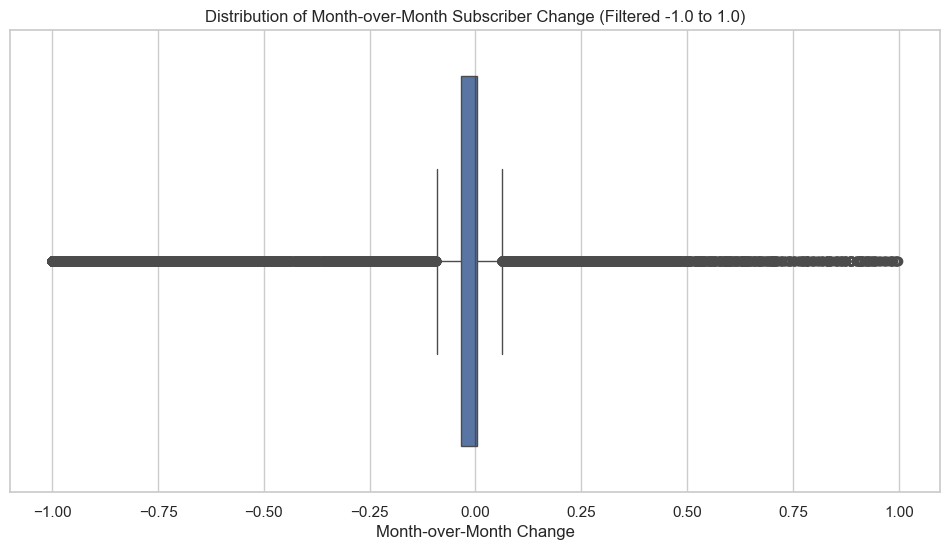

In [12]:
plt.figure(figsize=(12, 6))
# We'll filter out extreme outliers for a more readable boxplot
sns.boxplot(x=df_features[(df_features['mom_change'] > -1) & (df_features['mom_change'] < 1)]['mom_change'])
plt.title('Distribution of Month-over-Month Subscriber Change (Filtered -1.0 to 1.0)')
plt.xlabel('Month-over-Month Change')
plt.show()

### Feature Catalog

| Feature | Description |
|---|---|
| `mom_change` | Month-over-month percentage change in subscribers. |
| `churn` | Target variable. 1 if `mom_change` is less than -5%, 0 otherwise. |
| `lag_1_month` | Number of subscribers from the previous month. |
| `rolling_avg_3m` | Rolling average of subscribers over the last 3 months. |
| `market_share` | Provider's market share within its circle for the month. |
| `circle_rank` | Provider's rank (by subscribers) within its circle for the month. |
| `month` | The month of the record (1-12). |
| `year` | The year of the record. |

## PHASE 3 — Model Development & Validation

In [18]:
# Import all necessary libraries for this Phase
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Ensure lightgbm is installed
try:
    import lightgbm as lgb
except ImportError:
    print("LightGBM not found. Installing...")
    !pip install lightgbm
    import lightgbm as lgb

LightGBM not found. Installing...
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 8.5 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.0 MB/s eta 0:00:00


### Data Preparation for Modeling

In [19]:
# Define features and target
target = 'churn'
categorical_features = ['service_provider', 'circle', 'type_of_connection']

# Create a copy for modeling
df_model = df_features.copy()

# Create dummy variables for categorical features
df_model = pd.get_dummies(df_model, columns=categorical_features, drop_first=True)

# Get list of all feature columns (all columns minus id/target/leaky ones)
original_cols_to_drop = ['churn', 'date', 'mom_change', 'value', 'notes', 'unit']
all_feature_names = [col for col in df_model.columns if col not in original_cols_to_drop]

### Time-based Train-Test Split

We must split by date to prevent data leakage, ensuring we train on the past to predict the future.

In [20]:
train_end_date = '2017-12-31'

# Split the data into training and testing sets based on the date
train_df = df_model[df_model['date'] <= train_end_date]
test_df = df_model[df_model['date'] > train_end_date]

# Define X and y for training and testing
X_train = train_df[all_feature_names]
y_train = train_df[target]
X_test = test_df[all_feature_names]
y_test = test_df[target]

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Training churn rate: {y_train.mean():.2%}")
print(f"Testing churn rate: {y_test.mean():.2%}")

Training data shape: (44048, 85)
Testing data shape: (26680, 85)
Training churn rate: 16.12%
Testing churn rate: 29.07%


### Baseline Model: Logistic Regression

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     18923
           1       0.95      0.74      0.83      7757

    accuracy                           0.91     26680
   macro avg       0.93      0.86      0.89     26680
weighted avg       0.92      0.91      0.91     26680

AUC Score: 0.9261741696369887


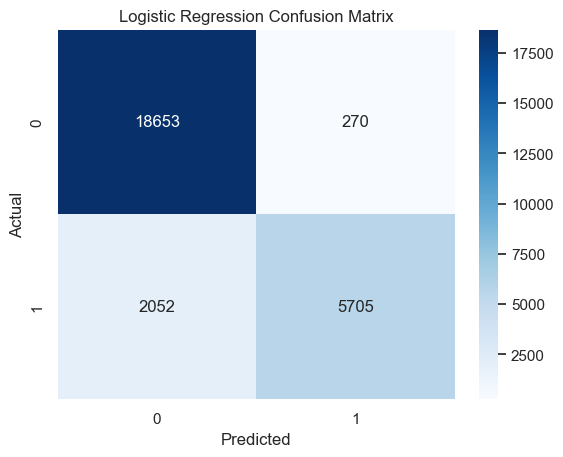

In [21]:
lr = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

print('Logistic Regression Results:')
print(classification_report(y_test, y_pred_lr))
print('AUC Score:', roc_auc_score(y_test, y_prob_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Advanced Model: LightGBM

[LightGBM] [Info] Number of positive: 7102, number of negative: 36946
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 957
[LightGBM] [Info] Number of data points in the train set: 44048, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161233 -> initscore=-1.649081
[LightGBM] [Info] Start training from score -1.649081
LightGBM Results:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     18923
           1       0.88      0.96      0.92      7757

    accuracy                           0.95     26680
   macro avg       0.93      0.95      0.94     26680
weighted avg       0.95      0.95      0.95     26680

AUC Score: 0.9896376528094073


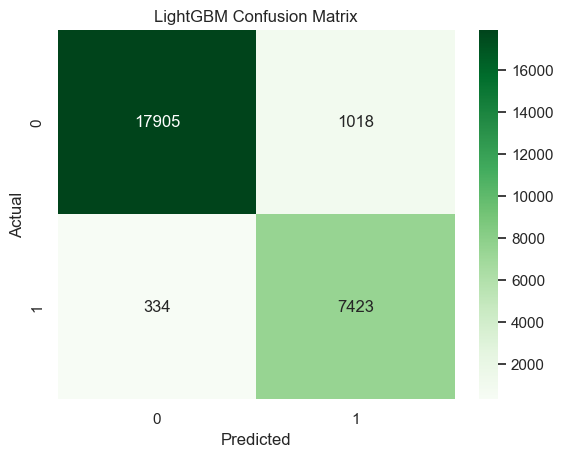

In [22]:
# Convert categorical feature names for LightGBM
X_train_lgb = X_train.copy()
X_test_lgb = X_test.copy()
X_train_lgb.columns = ["".join (c if c.isalnum() else "_" for c in str(col)) for col in X_train_lgb.columns]
X_test_lgb.columns = ["".join (c if c.isalnum() else "_" for c in str(col)) for col in X_test_lgb.columns]

lgbm = lgb.LGBMClassifier(objective='binary', random_state=42, is_unbalance=True) # Use is_unbalance for class weight
lgbm.fit(X_train_lgb, y_train)

y_pred_lgbm = lgbm.predict(X_test_lgb)
y_prob_lgbm = lgbm.predict_proba(X_test_lgb)[:, 1]

print('LightGBM Results:')
print(classification_report(y_test, y_pred_lgbm))
print('AUC Score:', roc_auc_score(y_test, y_prob_lgbm))

sns.heatmap(confusion_matrix(y_test, y_pred_lgbm), annot=True, fmt='d', cmap='Greens')
plt.title('LightGBM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
import joblib

joblib.dump(all_feature_names, "models/feature_names.pkl")
print("Saved feature names.")

Saved feature names.


#### ROC Curve

Comparing the two models.

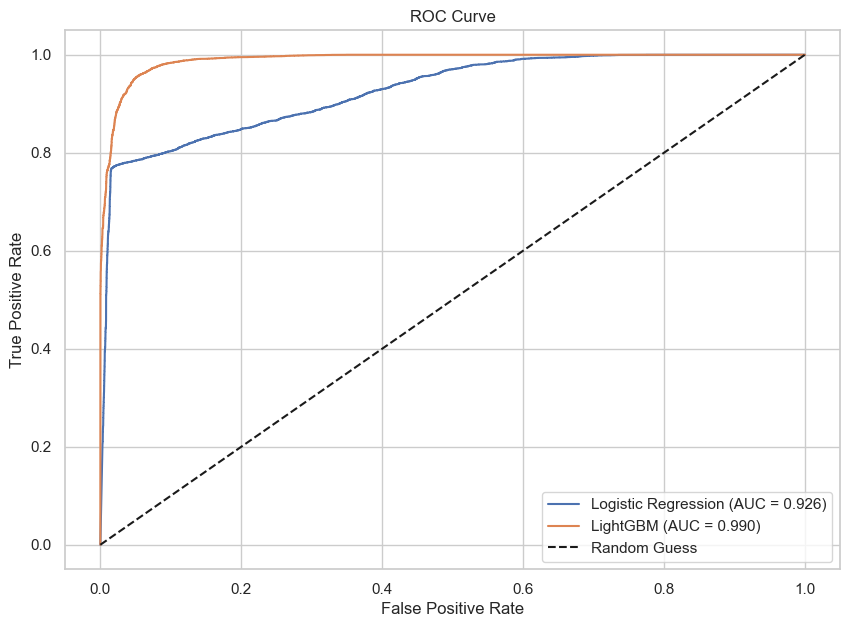

In [24]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_prob_lgbm)

plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.3f})')
plt.plot(fpr_lgbm, tpr_lgbm, label=f'LightGBM (AUC = {roc_auc_score(y_test, y_prob_lgbm):.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Model Interpretability

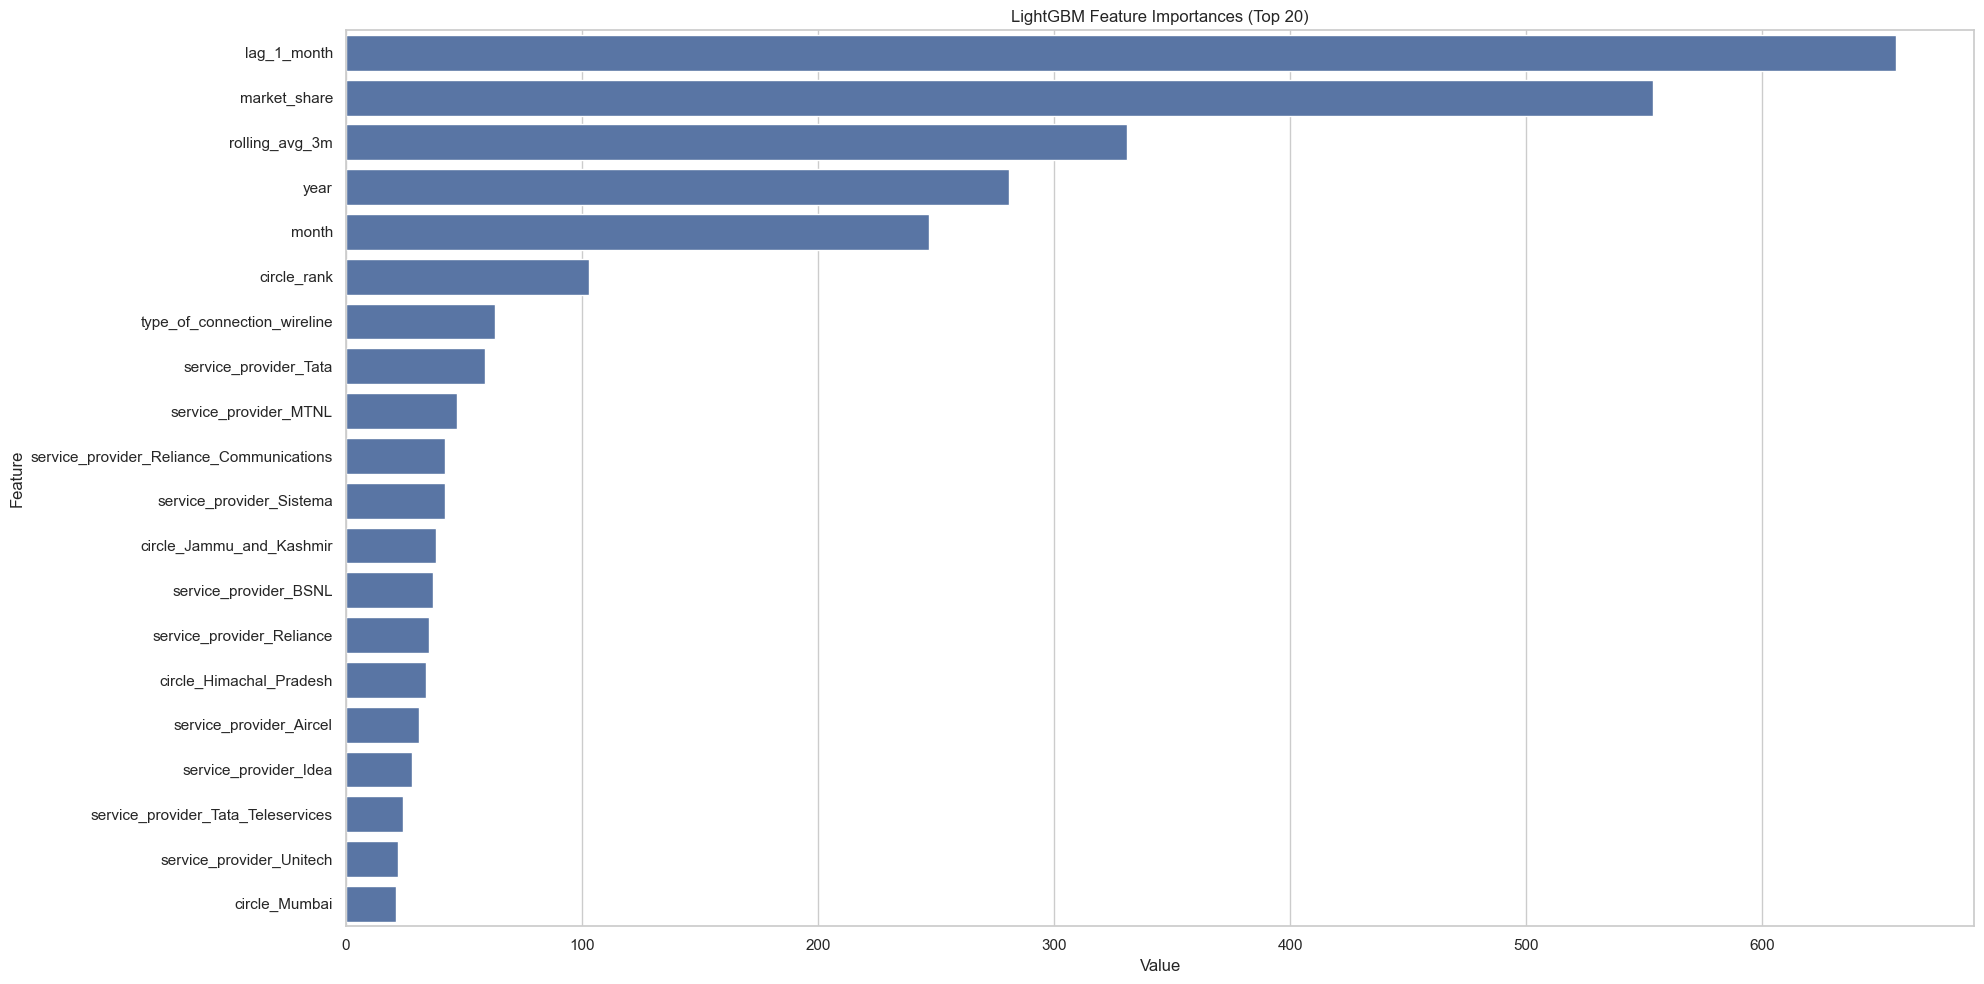

In [25]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_, X_train_lgb.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(20))
plt.title('LightGBM Feature Importances (Top 20)')
plt.tight_layout()
plt.show()

## PHASE 4 — Business Analysis & Insight Generation

### Churn Risk Ranking

In [26]:
df_results = df_features[df_features['date'] > train_end_date].copy()
df_results['churn_prob'] = y_prob_lgbm

risk_ranking = df_results[['service_provider', 'circle', 'date', 'churn', 'churn_prob']].sort_values(by='churn_prob', ascending=False)

print("Top 20 Highest Churn Risk Operator-Circle Pairs:")
risk_ranking.head(20)

Top 20 Highest Churn Risk Operator-Circle Pairs:


,service_provider,circle,date,churn,churn_prob
53986,Bharti Airtel,West Bengal,2021-11-01,1,0.999935
49694,Vodafone Idea,West Bengal,2024-07-01,1,0.999932
49464,Vodafone Idea,West Bengal,2024-08-01,1,0.999932
53843,Bharti Airtel,West Bengal,2021-10-01,1,0.999931
53396,Bharti Airtel,West Bengal,2022-08-01,1,0.999930
52783,Bharti Airtel,West Bengal,2022-07-01,1,0.999930
54917,Bharti Airtel,West Bengal,2021-12-01,1,0.999926
53702,Bharti Airtel,West Bengal,2021-09-01,1,0.999921
55654,Vodafone Idea,West Bengal,2020-11-01,1,0.999912
55386,Vodafone Idea,West Bengal,2020-10-01,1,0.999911


### Actionable Recommendations

| Churn Risk Level | Recommended Actions |
|---|---|
| High (> 0.7) | - Launch immediate retention campaigns (e.g., special offers, loyalty bonuses).<br>- Conduct network quality audit in the affected circle.<br>- Analyze competitor activities in that region. |
| Medium (0.4-0.7) | - Monitor subscriber trends closely.<br>- Proactive customer outreach to gather feedback. |

### Churn Risk Heatmap

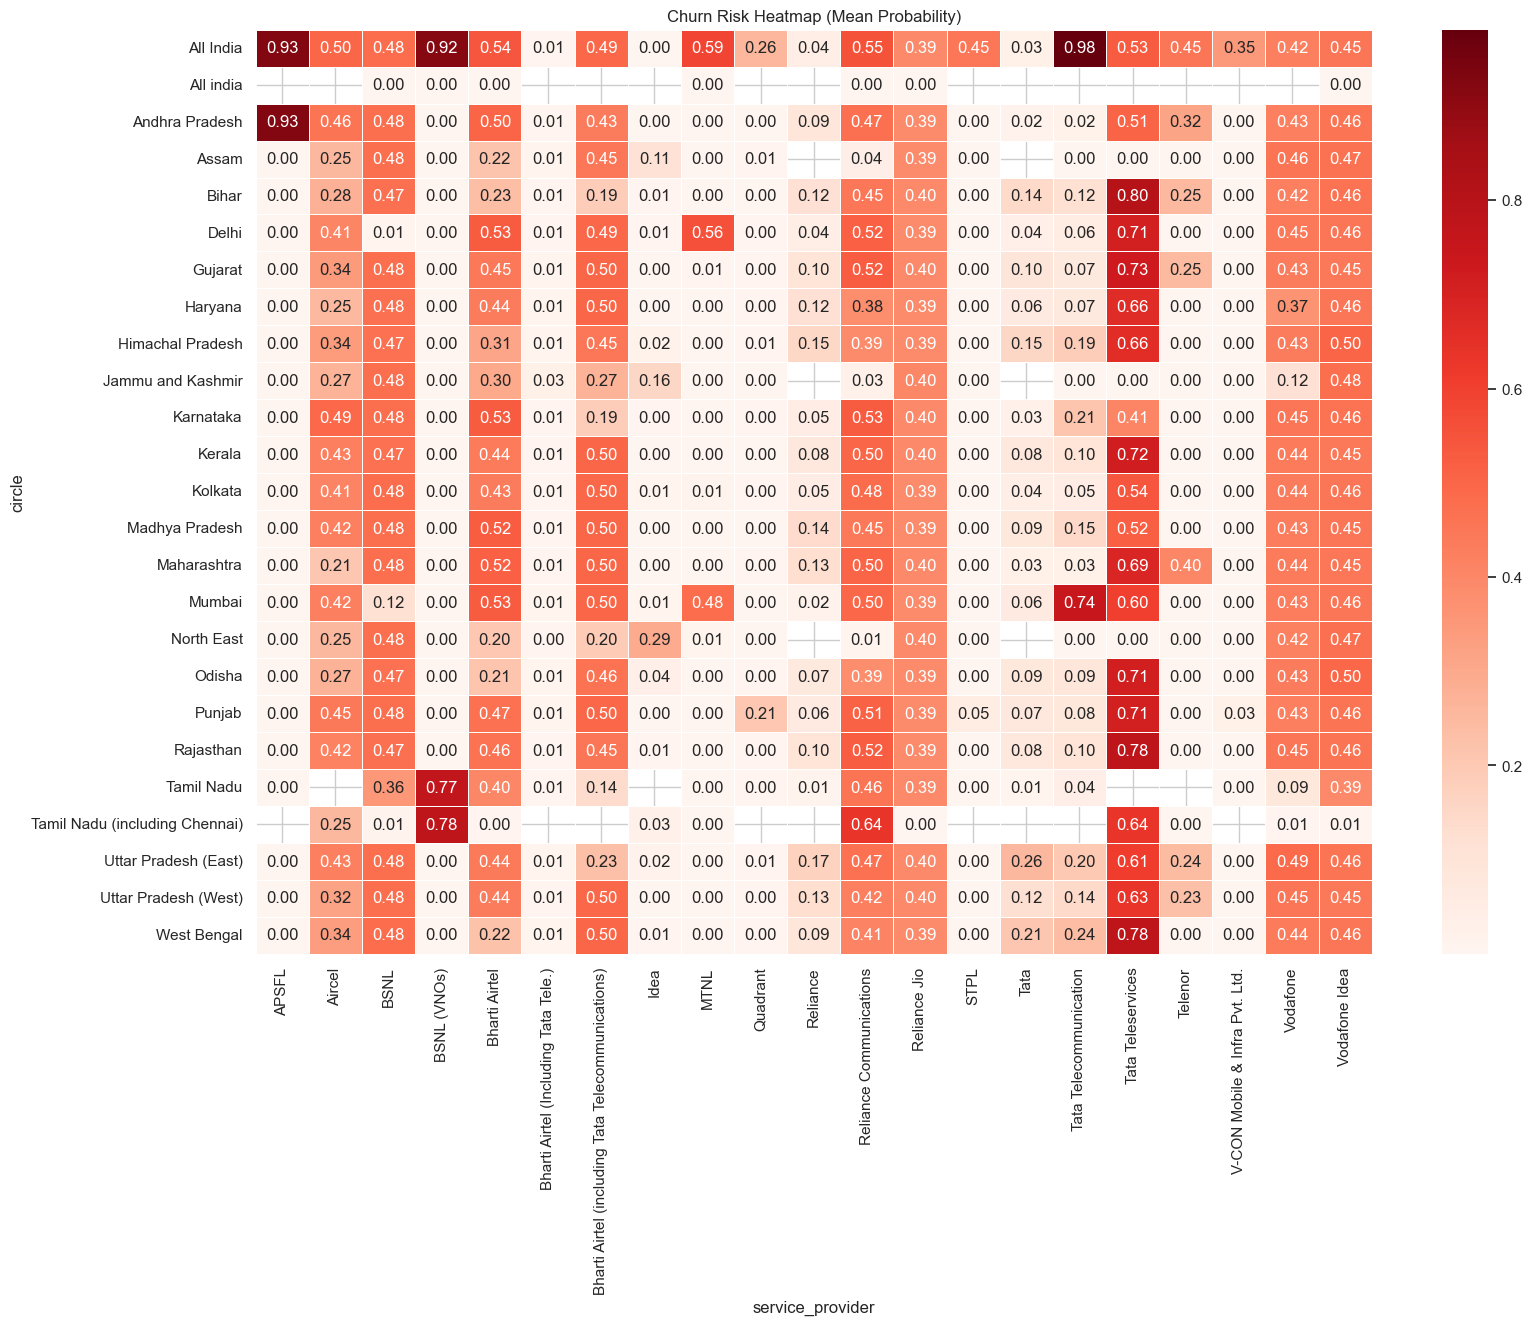

In [27]:
heatmap_data = risk_ranking.pivot_table(index='circle', columns='service_provider', values='churn_prob', aggfunc='mean')

plt.figure(figsize=(18, 12))
sns.heatmap(heatmap_data, annot=True, cmap='Reds', fmt='.2f', linewidths=.5)
plt.title('Churn Risk Heatmap (Mean Probability)')
plt.show()

## PHASE 5 — Production Readiness & Handover

### Model Packaging

In [28]:
import joblib

# Create model directory if it doesn't exist
os.makedirs('models', exist_ok=True)

joblib.dump(lgbm, 'models/churn_model.pkl')
print('Model saved as models/churn_model.pkl')

Model saved as models/churn_model.pkl


### Scoring Contract

The following markdown represents the `scoring_contract.md` file.

# API Scoring Contract: Telecom Churn Prediction Model

## 1. Introduction

This document defines the contract for the real-time churn prediction API. All client services consuming this API must adhere to the specifications outlined below. This contract ensures reliable communication and stable operation between the model and its consumers.

## 2. API Endpoint

The service provides a single endpoint for scoring.

-   **Method:** `POST`
-   **Endpoint:** `/predict`
-   **Content-Type:** `application/json`

## 3. Request Payload Schema

The request must be a JSON object containing a single key, `"features"`, which holds a list of JSON objects. Each inner object represents a customer to be scored and must contain all the features listed below with the correct data types.

### Feature Definitions

| Feature Name | Data Type | Description | Example |
| --- | --- | --- | --- |
| `monthly_rental` | `number` | The monthly rental charge for the customer in local currency. | `399.0` |
| `mom_change` | `number` | Percentage change in month-over-month revenue from the customer.| `-1.5` |
| `total_recharge_amt` | `integer` | Total recharge amount in the last quarter. | `1200` |
| `last_recharge_days` | `integer` | Days since the customer's last recharge. | `21` |
| `main_outgoing_mou` | `number` | Total minutes of use for outgoing calls. | `450.75` |
| `roam_og_mou` | `number` | Minutes of use for outgoing calls while roaming. | `0.0` |
| `circle_id` | `integer` | Unique identifier for the customer's telecom circle (region). | `101` |
| `service_provider` | `string` | The customer's current service provider. | `"Airtel"` |
| `circle_rank` | `integer` | The business rank of the telecom circle. | `1` |

---

### Example Request Body

```json
{
  "features": [
    {
      "monthly_rental": 399.0,
      "mom_change": -1.5,
      "total_recharge_amt": 1200,
      "last_recharge_days": 21,
      "main_outgoing_mou": 450.75,
      "roam_og_mou": 0.0,
      "circle_id": 101,
      "service_provider": "Airtel",
      "circle_rank": 1
    }
  ]
}
```

## 4. Response Payload Schema

The API will respond with a JSON object containing a single key, `"predictions"`. The value will be a list of objects, where each object corresponds to a customer from the request and contains the model's output.

### Output Definitions

| Field Name | Data Type | Description | Example |
| --- | --- | --- | --- |
| `churn_probability` | `number` | The model's predicted probability of churn, from 0.0 to 1.0. | `0.8234` |
| `predicted_churn` | `boolean` | The binary prediction. `true` if probability > 0.5, otherwise `false`. | `true` |

---

### Example Success Response (`200 OK`)

```json
{
  "predictions": [
    {
      "churn_probability": 0.8234,
      "predicted_churn": true
    }
  ]
}
```

## 5. Error Handling

The API will return standard HTTP status codes to indicate the outcome of a request.

### Error Responses

| Status Code | Meaning | Description |
| --- | --- | --- |
| `400 Bad Request` | **Validation Error** | The request payload is malformed, missing required features, or contains incorrect data types. The response body will contain details about the error. |
| `500 Internal Server Error` | **Server Error** | An unexpected error occurred on the server side while processing the request. This should be reported. |

---

### Example Error Response (`400 Bad Request`)

```json
{
  "error": "Validation Error: Missing required feature 'monthly_rental' in item 0."
}
```

### Monitoring Plan

The following markdown represents the `monitoring_policy.md` file.

# Model Monitoring Policy: Telecom Churn Prediction

## 1. Overview

This document outlines the monitoring strategy for the telecom churn prediction model. The goal is to ensure the model's ongoing performance, reliability, and business value by detecting and addressing issues such as data drift, concept drift, and performance degradation in a timely manner.

## 2. Monitored Components

### 2.1. Data Integrity & Drift

-   **Schema Validation:** Ensure incoming data for scoring conforms to the expected schema (feature names, data types, etc.).
-   **Feature Distribution Drift:** Track the statistical distribution of key input features (e.g., `mom_change`, `monthly_rental`, `circle_rank`).
-   **Missing Values:** Monitor the percentage of missing values for each feature.

### 2.2. Model Performance

-   **Predictive Accuracy:** Track core classification metrics over time.
-   **Prediction Distribution:** Monitor the distribution of churn probabilities and binary predictions (Churn vs. No Churn).

### 2.3. System Health (for live API deployment)

-   **API Latency:** Monitor the response time for prediction requests.
-   **API Error Rate:** Track the percentage of failed requests (e.g., 5xx server errors).
-   **Resource Utilization:** Monitor CPU, memory, and disk usage of the serving infrastructure.

## 3. Monitoring Metrics & Alerting Thresholds

| Category | Metric | Tool/Method | Frequency | Alerting Threshold |
| --- | --- | --- | --- | --- |
| **Data Drift** | **Kolmogorov-Smirnov (K-S) Test** | Python script (scipy) | Daily | p-value < 0.05 for key features vs. training data |
| | **Missing Value Percentage** | Custom script | Daily | > 10% increase from baseline for any feature |
| **Concept Drift** | **Churn Rate Drift** | Dashboard query | Weekly | Churn rate changes by > 15% relative to the past month |
| **Model Perf.** | **AUC-ROC** | Evaluation script | Weekly | < 0.80 |
| | **Precision-Recall** | Evaluation script | Weekly | Precision < 0.75 or Recall < 0.65 for the churn class|
| | **Prediction Probability Mean** | Logging/Dashboard | Daily | +/- 2 standard deviations from the training baseline |
| **System Health** | **P95 Latency** | APM Tool | Real-time | > 500ms |
| | **Error Rate** | APM Tool | Real-time | > 1% over a 5-minute window |

## 4. Monitoring & Retraining Workflow

1.  **Data Logging:** All prediction requests and the corresponding model predictions are logged to a secure data store.
2.  **Automated Monitoring:** A scheduled job runs daily/weekly to compute the metrics defined above.
3.  **Dashboarding:** Metrics are pushed to a central dashboard (e.g., Grafana, Power BI) for visualization and trend analysis.
4.  **Alerting:** If any metric crosses its defined threshold, an automated alert is sent to the on-call data science and engineering teams via Slack and PagerDuty.
5.  **Triage & Diagnosis:** The on-call team investigates the alert to determine the root cause (e.g., upstream data issue, genuine change in customer behavior).
6.  **Retraining Trigger:** A model retraining cycle is triggered if:
    -   A significant drop in model performance (e.g., AUC falls below threshold) is confirmed.
    -   Severe data or concept drift is detected and verified.
    -   A minimum of 3 months has passed since the last retraining, and new labeled data is available.

## 5. Roles & Responsibilities

-   **Data Science Team:** Owns the model performance and drift metrics. Responsible for analyzing drift, diagnosing performance issues, and executing model retraining.
-   **ML Engineering Team:** Owns the prediction service's system health and data logging infrastructure. Responsible for investigating and resolving API latency, errors, and other operational issues.
-   **On-Call Personnel:** Act as the first responders to alerts, responsible for initial triage and escalation.

### Deployment Suggestions

-   **Batch Scoring:** The model can be used to score all subscribers on a monthly basis. The output can be a report of high-risk customers for the business teams.
-   **Real-time API:** For more immediate actions, the model can be deployed as a real-time API. This would allow other systems to get a churn prediction for a specific subscriber on-demand.

--- 
## End of Analysis

---

# Project Handover Checklist: Telecom Churn Prediction

This checklist is designed to facilitate a smooth handover of the Telecom Churn Prediction project. The goal is to ensure that the receiving team has all necessary information and resources to maintain, operate, and further develop the solution effectively.

## 1. Project Overview

-   [ ] **Project Goal:** Clearly defined objective of the churn prediction model (e.g., reduce customer churn, identify at-risk customers).
-   [ ] **Business Context:** Understanding of how the model integrates into business processes and decision-making.
-   [ ] **Key Stakeholders:** List of primary business owners, product managers, and other relevant parties.
-   [ ] **Current Status:** Summary of the project's current phase (e.g., deployed in production, in UAT, development).

## 2. Codebase & Environment

-   [ ] **Code Repository Access:** Link to Git repository (e.g., GitHub, GitLab) and confirmation of access for the receiving team.
-   [ ] **Main Code Entry Points:** Identify key scripts, notebooks (`telecom_churn_analysis.ipynb`), and modules.
-   [ ] **Virtual Environment/Dependencies:**
    -   [ ] `requirements.txt` is up-to-date and complete.
    -   [ ] Instructions for setting up the virtual environment (e.g., `conda env create -f environment.yml` or `pip install -r requirements.txt`).
-   [ ] **Environment Variables:** List of necessary environment variables and their purpose (e.g., database credentials, API keys).
-   [ ] **Configuration Files:** Explanation of configuration files and how to modify them.

## 3. Data

-   [ ] **Data Sources:** Identification of all upstream data sources (e.g., databases, data lakes, APIs).
-   [ ] **Data Schemas:** Documentation of input data schema (`metadata.csv`, `scoring_contract.md`).
-   [ ] **Data Ingestion/ETL Processes:** Explanation of how raw data is acquired, transformed, and loaded.
-   [ ] **Data Storage:** Location of training data, validation data, and any processed datasets.
-   [ ] **Data Refresh Schedule:** Frequency and method of data updates.

## 4. Model

-   [ ] **Model Architecture:** Description of the chosen model (e.g., LightGBM Classifier).
-   [ ] **Model Training Process:**
    -   [ ] Link to training script/notebook.
    -   [ ] Explanation of hyperparameter tuning strategy.
    -   [ ] Data splitting methodology (train, validation, test).
-   [ ] **Model Artifacts:** Location of trained model files (`churn_model.pkl`).
-   [ ] **Model Evaluation Metrics:** Primary and secondary metrics used for evaluation (e.g., AUC-ROC, Precision, Recall).
-   [ ] **Model Versioning:** How model versions are managed.

## 5. Deployment & Infrastructure

-   [ ] **Deployment Strategy:** Description of how the model is deployed (e.g., REST API, batch prediction, containerized application).
-   [ ] **Infrastructure Details:**
    -   [ ] Cloud provider (e.g., AWS, Azure, GCP).
    -   [ ] Specific services used (e.g., EC2, Sagemaker, Azure ML, Kubernetes).
-   [ ] **CI/CD Pipelines:** Location and explanation of continuous integration/continuous deployment pipelines.
-   [ ] **Access Credentials:** Secure handover of necessary access credentials (e.g., SSH keys, cloud console access).

## 6. Monitoring & Alerting

-   [ ] **Monitoring Strategy:** Reference to `monitoring_policy.md`.
-   [ ] **Monitoring Dashboards:** Links to relevant dashboards (e.g., Grafana, custom dashboards).
-   [ ] **Alerting Configuration:** Explanation of alert rules, notification channels (e.g., Slack, PagerDuty), and escalation paths.
-   [ ] **Incident Response Playbook:** Steps to take when an alert is triggered.

## 7. Documentation & Communication

-   [ ] **Project Documentation:**
    -   [ ] `README.md` is complete and accurate.
    -   [ ] `monitoring_policy.md` and `scoring_contract.md` are up-to-date.
-   [ ] **Contact List:** Key personnel for queries (e.g., original developer, data owner, business lead).
-   [ ] **Communication Channels:** Preferred channels for ongoing support and questions.

## 8. Future Work & Known Issues

-   [ ] **Backlog Items:** List of planned features, improvements, or research tasks.
-   [ ] **Known Bugs/Issues:** Documentation of any outstanding bugs, limitations, or technical debt.
-   [ ] **Areas for Improvement:** Suggestions for future enhancements.

---

**Sign-off:**

**Handing Over By:** Salma Syed Izhar

**Date:** 19-10-2025